In [1]:
#使用するライブラリのインポート
import codecs
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# APARのcsvファイルを2つ読み込んで、それぞれData Frame df_1,df_2 として保存
with codecs.open("apar_info1.csv", "r", "utf-8", "ignore") as file:
    df_1 = pd.read_table(file, delimiter=",")
    
with codecs.open("apar_info2.csv", "r", "utf-8", "ignore") as file:
    df_2 = pd.read_table(file, delimiter=",")

# 二つのdataframeを合体し、df_aparとして保存
df_apar = pd.concat([df_1, df_2]) 

In [4]:
df_apar = pd.concat([df_1, df_2]) 
df_apar.head()

,APAR,STATUS,ISEV,RCOMP,SBDATE,CLOSE CODE,SEV,RREL,RCDATE,HIPER,...,ERROR DESCRIPTION,LOCAL FIX,USERS AFFECTED,PROBLEM DESCRIPTION,RECOMMENDATION,OPTIONAL ERROR DESCRIPTION,PROBLEM CONCLUSION,TEMPORARY FIX,COMMENTS,CIRCUMVENTION
0,OA31527,'CLOSED,'3,'5752SC1BH,'09/12/23,'PER,'3,'R708,'09/12/29,NaN,...,'The customer is seeing a two minute delay bef...,'None\n\n,'All users of HJE7708 with OA20935\napplied\n\n,'SYSGONE complete processing is\ndelayed which...,'\n\n\n,'Due to a lack of an IXZXIXCL invocation for t...,'TYPE/RESTART(WARM) IPL/REQUIRED(YES) CLPA(YES...,'*** * TEMPORARY FIX MAY BE OBTAINED FROM DLL ...,'\n\n\n,'\n\n\n
1,OA31538,'CLOSED,'3,'5655T07CV,'10/01/05,'PER,'2,'R1A0,'10/01/06,NaN,...,'Abend 0C1 in module IRRENV10 after activating...,"'If JC4R1A0 and ptf UA48576 are not accepted, ...",'All users of zSecure Command Verifier v1.10\n\n,'Activating zSecure Command Verifier\nleads to...,NaN,'Having zSecure Command Verifier active leads ...,'Due to the packaging error some extra code se...,NaN,NaN,NaN
2,OA30599,'CLOSED,'2,'5752SC1B4,'09/09/30,'PER,'2,'R750,'09/10/01,'HIPER/Y,...,'In z/OS 1.10 an abend0C4 may occur during dyn...,'If address space does not end and abend0C4's ...,'All HBB7750 and above environments.\n\n,"'ABEND0C4 in IEFAB451, IEFAB4A0 or\nIEFAB421.\n\n",'\n\n\n,'In highly multitasked environments such as DB...,'Allocation's processing is corrected to set u...,'*********\n* HIPER *\n*********\n\n,'\n\n\n,'\n\n\n
3,OA30718,'CLOSED,'4,'5752SC1B4,'09/10/08,'PER,'4,'R740,'09/10/09,'HIPER/Y,...,"'Some tape library environments, including the...",'\n\n\n,'All HBB7740 and above environments which\nuse...,' Performance degradation due to poor\n choice...,'\n\n\n,'When in an SMS managed tape environment that ...,'Tape Allocation is changed to compute device ...,'*********\n* HIPER *\n*********\n\n,'\n\n\n,'\n\n\n
4,OA30827,'CLOSED,'3,'5697ENV00,'09/10/21,'PER,'3,'R54B,'09/10/21,'HIPER/Y,...,'INTERMITTENTLY CNMCALRT WILL GO INTO A LOOP W...,NaN,'All NetView for z/OS V5R4 users of CNMCALRT.\n\n,'Sometimes CNMCALRT will go into a hard\nloop ...,NaN,'CNMCALRT does not clear the DTR area in its a...,'CNMCALRT is being changed to use the task's a...,NaN,NaN,NaN


In [5]:
df_apar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35998 entries, 0 to 18034
Data columns (total 31 columns):
APAR                          35998 non-null object
STATUS                        35998 non-null object
ISEV                          35998 non-null object
RCOMP                         35998 non-null object
SBDATE                        35998 non-null object
CLOSE CODE                    35998 non-null object
SEV                           35998 non-null object
RREL                          35998 non-null object
RCDATE                        35998 non-null object
HIPER                         11724 non-null object
SEC/INT                       15221 non-null object
FCOMP                         35998 non-null object
CLDATE                        35998 non-null object
PE                            2809 non-null object
PFREL                         35998 non-null object
FAILURE KEYWORD               35998 non-null object
MODULES/MACROS                35995 non-null object
APPLICAB

In [6]:
df_apar.columns

Index(['APAR', 'STATUS', 'ISEV', 'RCOMP', 'SBDATE', 'CLOSE CODE', 'SEV',
       'RREL', 'RCDATE', 'HIPER', 'SEC/INT', 'FCOMP', 'CLDATE', 'PE', 'PFREL',
       'FAILURE KEYWORD', 'MODULES/MACROS', 'APPLICABLE LVL', 'function?',
       'version?', 'ABSTRACT', 'ERROR DESCRIPTION', 'LOCAL FIX',
       'USERS AFFECTED', 'PROBLEM DESCRIPTION', 'RECOMMENDATION',
       'OPTIONAL ERROR DESCRIPTION', 'PROBLEM CONCLUSION', 'TEMPORARY FIX',
       'COMMENTS', 'CIRCUMVENTION'],
      dtype='object')

In [7]:
#APAR名の列をインデックスにする
df_apar.set_index('APAR',drop=True,inplace=True)

In [8]:
#日付のフォーマットをDataFrameのフォーマットに変換
df_apar["SBDATE"] = pd.to_datetime(df_apar["SBDATE"],format="'%y/%m/%d")
df_apar["RCDATE"] = pd.to_datetime(df_apar["RCDATE"],format="'%y/%m/%d")
df_apar["CLDATE"] = pd.to_datetime(df_apar["CLDATE"],format="'%y/%m/%d")

In [9]:
df_apar[['SBDATE','RCDATE','CLDATE']].head()

,SBDATE,RCDATE,CLDATE
APAR,,,
OA31527,2009-12-23,2009-12-29,2010-01-08
OA31538,2010-01-05,2010-01-06,2010-01-13
OA30599,2009-09-30,2009-10-01,2010-01-04
OA30718,2009-10-08,2009-10-09,2010-01-14
OA30827,2009-10-21,2009-10-21,2010-01-13


In [10]:
#PE,HIPER列をカウント
print(df_apar['PE'].value_counts())
print(df_apar['HIPER'].value_counts())

'PE/Y    2809
Name: PE, dtype: int64
'HIPER/Y    11724
Name: HIPER, dtype: int64


In [12]:
#PE、HIPERの列について、PE,HIPERに該当する値を1に変換する
df_apar['PE'] = df_apar['PE'].str.replace("'PE/Y", "1")
df_apar['HIPER'] = df_apar['HIPER'].str.replace("'HIPER/Y", "1")

#PE、HIPERの列について、値が入っていないNaNを、0に変換する
df_apar['PE'] = df_apar['PE'].fillna(0)
df_apar['HIPER'] = df_apar['HIPER'].fillna(0)

#PE、HIPERの列について、0,1 の値をboolean形式に変換する
df_apar['PE'] = df_apar['PE'].astype(bool)
df_apar['HIPER'] = df_apar['HIPER'].astype(bool)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [13]:
df_apar['COMMENTS'] = df_apar['COMMENTS'].fillna('none')
#PEを起こしたPTFを検出。comment欄に「IN ERROR. SEE APAR」が記載されている列をPE_involve=Trueとし、無い場合はFalseとする。
df_apar['PE_involve'] = False
df_apar.loc[df_apar['COMMENTS'].str.contains('IN ERROR. SEE APAR'),'PE_involve'] = True
df_apar.loc[df_apar['COMMENTS'].str.contains('IN ERROR.SEE APAR'),'PE_involve'] = True

In [14]:
#PE_involveの件数を確認
a = len(df_apar[df_apar['PE_involve']==True])
b = len(df_apar)
print('PE_involveの数:',a)
print('PE_involveの割合(%):',(a/b)*100)

PE_involveの数: 420
PE_involveの割合(%): 1.1667314850825046


In [15]:
df_apar[['PE','HIPER','PE_involve']].head()

,PE,HIPER,PE_involve
APAR,,,
OA31527,False,False,False
OA31538,True,False,False
OA30599,False,True,False
OA30718,False,True,False
OA30827,False,True,False


In [16]:
# 修正までの日数を列に追加。（列名を要確認）
df_apar['days_to_aparclose'] = df_apar['CLDATE']-df_apar['SBDATE']
df_apar['days_to_aparclose'] = df_apar['days_to_aparclose'].dt.days

In [17]:
df_apar['days_to_aparclose'].describe()

count    35998.000000
mean        68.494861
std         85.888812
min          0.000000
25%         20.000000
50%         44.000000
75%         84.000000
max       1535.000000
Name: days_to_aparclose, dtype: float64

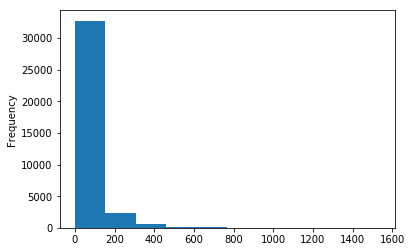

In [18]:
#修正までの日数をプロットしてみる
df_apar['days_to_aparclose'].plot.hist()

In [20]:
#SEVの列の' を削除。それぞれに対応する変数列を追加
df_apar['SEV'] = df_apar['SEV'].str.replace("'", "")
df_apar = pd.get_dummies(df_apar, columns=["SEV"])

In [21]:
# 列同士の相関関係を表示
df_apar.corr()

,HIPER,PE,PE_involve,days_to_aparclose,SEV_1,SEV_2,SEV_3,SEV_4
HIPER,1.000000,0.060367,-0.021964,-0.013714,0.183035,0.178476,-0.157698,-0.157531
PE,0.060367,1.000000,0.040726,-0.088451,0.045482,0.156960,-0.129213,-0.074524
PE_involve,-0.021964,0.040726,1.000000,0.039789,-0.010126,-0.001726,-0.010691,0.026375
days_to_aparclose,-0.013714,-0.088451,0.039789,1.000000,-0.054341,-0.058466,0.033047,0.076938
SEV_1,0.183035,0.045482,-0.010126,-0.054341,1.000000,-0.192258,-0.192357,-0.080136
SEV_2,0.178476,0.156960,-0.001726,-0.058466,-0.192258,1.000000,-0.723753,-0.301516
SEV_3,-0.157698,-0.129213,-0.010691,0.033047,-0.192357,-0.723753,1.000000,-0.301671
SEV_4,-0.157531,-0.074524,0.026375,0.076938,-0.080136,-0.301516,-0.301671,1.000000


In [22]:
#修正までに100日以上掛かっている件数をカウント
print('100日以上掛かってる件数',len(df_apar[df_apar['days_to_aparclose'] > 100]))

100日以上掛かってる件数 6719


In [23]:
#FAILURE KEYWORD列にNEWの文字列を含むものを抜粋し、df_newfuncのデータフレームとして定義
df_newfunc = df_apar[df_apar['FAILURE KEYWORD'].str.contains('NEW')]
df_newfunc['FAILURE KEYWORD'].unique()

array(["'NF NEW FUNCTION", "'NF NEWFUNC", "'NF NEWFUNCTION",
       "'NF NEWFUCTION", "'NF NEW Function", "'NF NEWFUNCT", "'NF NEWF",
       "'IN NEW FUNCTION", "'NF NEW FUCNTION", "'NF NEWFUNCTIO",
       "'NF NEW MESSAGE", "'NF NEWFUNCTN", "'NF NEWFUNCTION:",
       "'NF NEWFUN", "'NF  NEWFUNC", "'NF NEWFUNCTOIN", "'NF NEW FUNCTIOM",
       "'NF NEWFUNCTI", "'NF NEW FUNC", "'NF NEW FUCTION", "'NF NEW",
       "'NF NEW FUNCTIO", "'NF NEW_FUNCTION", "'AI NEW FUNCTION"], dtype=object)

In [24]:
#FAILURE KEYWORD列にNEWの文字列を含む場合のPE数
a = len(df_newfunc)
b = len(df_newfunc[df_newfunc['PE_involve']==True])
print('FAILURE KEYWORD列にNEWの文字列を含む数:',a)
print('NEWを含むAPARのPE_involve数:',b)
print('NEWを含むAPARのPE_involveの割合(%):',(b/a)*100)

FAILURE KEYWORD列にNEWの文字列を含む数: 2185
NEWを含むAPARのPE_involve数: 84
NEWを含むAPARのPE_involveの割合(%): 3.8443935926773456
